# Practical ML: Scikit-learn
## Introducing Pandas and Scikit-learn
### Juan Antonio Cortés (jacortes@ugr.es)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

It is the perfect tool to explore, clean and process tabular data.

# Pandas series

Pandas tables (DataFrames from now on) are comprised of series (one-dimensional ndarray with axis labels). Below, an example of a series with a missing value.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

# Pandas DataFrame

DataFrames can be built from different data types. For example, we can build a DataFrame with a date column (it will be the index of the DataFrame in this example) and four numerical columns (the data).

In [3]:
dates = pd.date_range('20201101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [4]:
df

,A,B,C,D
2020-11-01,0.822360,1.157473,-0.799502,1.150930
2020-11-02,0.350608,-1.262714,-0.461467,-0.745286
2020-11-03,-0.269674,-1.238298,0.898560,-1.429048
2020-11-04,-1.016871,-0.218234,0.855766,-1.150457
2020-11-05,-1.386138,0.178950,-0.448507,0.408281
2020-11-06,2.153887,0.227719,-0.184575,-0.221846


We can also build a DataFrame from a Python dictionary. Thanks to the flexibility of Pandas we can mix different data types inside the same DataFrame. For example: integers, time stamps, floats, text...

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20201101'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

In [6]:
df2

,A,B,C,D,E,F
0,1.0,2020-11-01,1.0,3,test,foo
1,1.0,2020-11-01,1.0,3,train,foo
2,1.0,2020-11-01,1.0,3,test,foo
3,1.0,2020-11-01,1.0,3,train,foo


# Viewing data

Once we have our DataFrame we can use different approaches to view it. Pandas offers multiples ways to accomplish this task:

We can peek at the beginning of the DataFrame

In [7]:
df.head()

,A,B,C,D
2020-11-01,0.822360,1.157473,-0.799502,1.150930
2020-11-02,0.350608,-1.262714,-0.461467,-0.745286
2020-11-03,-0.269674,-1.238298,0.898560,-1.429048
2020-11-04,-1.016871,-0.218234,0.855766,-1.150457
2020-11-05,-1.386138,0.178950,-0.448507,0.408281


Or the end:

In [8]:
df.tail()

,A,B,C,D
2020-11-02,0.350608,-1.262714,-0.461467,-0.745286
2020-11-03,-0.269674,-1.238298,0.898560,-1.429048
2020-11-04,-1.016871,-0.218234,0.855766,-1.150457
2020-11-05,-1.386138,0.178950,-0.448507,0.408281
2020-11-06,2.153887,0.227719,-0.184575,-0.221846


We can also list the name of the columns:

In [9]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

Transposing the data is a trivial task with Pandas:

In [10]:
df.T

,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06
A,0.822360,0.350608,-0.269674,-1.016871,-1.386138,2.153887
B,1.157473,-1.262714,-1.238298,-0.218234,0.178950,0.227719
C,-0.799502,-0.461467,0.898560,0.855766,-0.448507,-0.184575
D,1.150930,-0.745286,-1.429048,-1.150457,0.408281,-0.221846


As well as sort the DataFrame. For example, we can sort it by column in descending order:

In [11]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-11-01,1.150930,-0.799502,1.157473,0.822360
2020-11-02,-0.745286,-0.461467,-1.262714,0.350608
2020-11-03,-1.429048,0.898560,-1.238298,-0.269674
2020-11-04,-1.150457,0.855766,-0.218234,-1.016871
2020-11-05,0.408281,-0.448507,0.178950,-1.386138
2020-11-06,-0.221846,-0.184575,0.227719,2.153887


Or by column:

In [12]:
df.sort_values(by='B')

,A,B,C,D
2020-11-02,0.350608,-1.262714,-0.461467,-0.745286
2020-11-03,-0.269674,-1.238298,0.898560,-1.429048
2020-11-04,-1.016871,-0.218234,0.855766,-1.150457
2020-11-05,-1.386138,0.178950,-0.448507,0.408281
2020-11-06,2.153887,0.227719,-0.184575,-0.221846
2020-11-01,0.822360,1.157473,-0.799502,1.150930


Pandas also offers a quick statistic summary of the data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.109028,-0.192517,-0.023288,-0.331238
std,1.295781,0.935596,0.724413,0.980145
min,-1.386138,-1.262714,-0.799502,-1.429048
25%,-0.830072,-0.983282,-0.458227,-1.049164
50%,0.040467,-0.019642,-0.316541,-0.483566
75%,0.704422,0.215527,0.595680,0.250750
max,2.153887,1.157473,0.898560,1.150930


# Selection

Another usual task whilst working with data is the selection. Pandas offers a "pythonic" selection interface so we can slice our DataFrame in multiple ways. With Series, the syntax works exactly as with an ndarray, returning a slice of the values and the corresponding labels.

We can select by column:

In [14]:
df['A']

2020-11-01    0.822360
2020-11-02    0.350608
2020-11-03   -0.269674
2020-11-04   -1.016871
2020-11-05   -1.386138
2020-11-06    2.153887
Freq: D, Name: A, dtype: float64

In [15]:
df[['A', 'C']]

,A,C
2020-11-01,0.822360,-0.799502
2020-11-02,0.350608,-0.461467
2020-11-03,-0.269674,0.898560
2020-11-04,-1.016871,0.855766
2020-11-05,-1.386138,-0.448507
2020-11-06,2.153887,-0.184575


By index:

In [16]:
df[0:3]

,A,B,C,D
2020-11-01,0.822360,1.157473,-0.799502,1.150930
2020-11-02,0.350608,-1.262714,-0.461467,-0.745286
2020-11-03,-0.269674,-1.238298,0.898560,-1.429048


Or by a combination of the previous method:

In [17]:
df.iloc[1:3, :]

,A,B,C,D
2020-11-02,0.350608,-1.262714,-0.461467,-0.745286
2020-11-03,-0.269674,-1.238298,0.898560,-1.429048


In [18]:
df.iloc[:, 1:3]

,B,C
2020-11-01,1.157473,-0.799502
2020-11-02,-1.262714,-0.461467
2020-11-03,-1.238298,0.898560
2020-11-04,-0.218234,0.855766
2020-11-05,0.178950,-0.448507
2020-11-06,0.227719,-0.184575


In [19]:
df.index

DatetimeIndex(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df.loc['2020-11-3':'2020-11-5']

,A,B,C,D
2020-11-03,-0.269674,-1.238298,0.898560,-1.429048
2020-11-04,-1.016871,-0.218234,0.855766,-1.150457
2020-11-05,-1.386138,0.178950,-0.448507,0.408281


# Boolean indexing

Pandas also supports boolean indexing. With this feature we can select data based on conditions, complex or simple.

For example, we can obtain the boolean mask that satisfies the following condition:

In [21]:
mask = df > 0
mask

,A,B,C,D
2020-11-01,True,True,False,True
2020-11-02,True,False,False,False
2020-11-03,False,False,True,False
2020-11-04,False,False,True,False
2020-11-05,False,True,False,True
2020-11-06,True,True,False,False


In [22]:
df[mask]

,A,B,C,D
2020-11-01,0.822360,1.157473,NaN,1.150930
2020-11-02,0.350608,NaN,NaN,NaN
2020-11-03,NaN,NaN,0.898560,NaN
2020-11-04,NaN,NaN,0.855766,NaN
2020-11-05,NaN,0.178950,NaN,0.408281
2020-11-06,2.153887,0.227719,NaN,NaN


We can also apply these conditions over a subset of the data. For example, we can get all the values that satisfy the next constraint:

In [23]:
df[df['A'] > 0]

,A,B,C,D
2020-11-01,0.822360,1.157473,-0.799502,1.150930
2020-11-02,0.350608,-1.262714,-0.461467,-0.745286
2020-11-06,2.153887,0.227719,-0.184575,-0.221846


And of course the logical operators (and, or, exclusive-or) are supported:

In [24]:
df[(df['A'] > 0) & (df['C'] > 0)]

,A,B,C,D


# Missing data

Pandas can handle missing values without hassle. Given the Series introduced at the beginning of the notebook which contains one missing value:

In [25]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

We can obtain which values are missing (NaN):

In [26]:
pd.isna(s)

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

As we stated previously Pandas allows boolean indexing...

In [27]:
s[pd.isna(s)]

3   NaN
dtype: float64

At this point we are left with three choices: do nothing, delete the missing values or replace them with a value. The first one is not an issue and with Pandas neither of them are.

We can easily delete them:

In [28]:
s.dropna(how='any')

0    1.0
1    3.0
2    5.0
4    6.0
5    8.0
dtype: float64

Or replace it with another value, in this case 5, but Pandas offers multiple options: previous/next valid value, mean or whichever function we pass to the `fillna` method.

In [29]:
s.fillna(value=5)

0    1.0
1    3.0
2    5.0
3    5.0
4    6.0
5    8.0
dtype: float64

# Plotting

Pandas offers a shortcut to `matplotlib` so we can easily plot our data with the call of a method. Let's build a random time series dataset and plot it.

In [30]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('11/1/2020', periods=1000))
ts = ts.cumsum()

The default plot type is the `line` plot, perfect for the data at hand.

<AxesSubplot:>

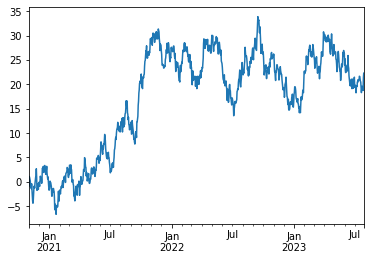

In [31]:
ts.plot()

We can also plot multivariate data and Pandas will handle the labels, legends, colors...

<AxesSubplot:>

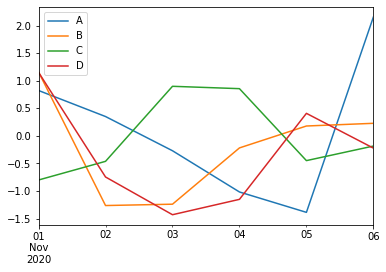

In [32]:
df.plot()

Or change the plot type:

<AxesSubplot:>

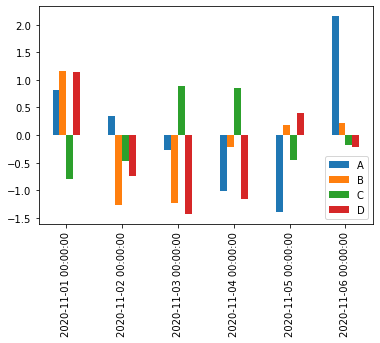

In [33]:
df.plot(kind='bar')

# Correlation "plot"

In some cases we don't even need to use the binding with Matplotlib. For example, another usual plot we can make with Pandas and Pandas alone is the correlation plot.

In [34]:
df_corr = df.corr()
df_corr

,A,B,C,D
A,1.000000,0.236466,-0.360596,0.222564
B,0.236466,1.000000,-0.528606,0.857962
C,-0.360596,-0.528606,1.000000,-0.854416
D,0.222564,0.857962,-0.854416,1.000000


Pandas supports styles (even with HTML and CSS) so creating a colored correlation plot is really easy.

In [35]:
df_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,A,B,C,D
A,1.00,0.24,-0.36,0.22
B,0.24,1.00,-0.53,0.86
C,-0.36,-0.53,1.00,-0.85
D,0.22,0.86,-0.85,1.00


# Data reading

And if you are wondering Pandas can also read (and write) from multiple file types: CSV, Excel, HDF5, Parquet... Let's load the SDSS (Sloan Digital Sky Survey) dataset from https://www.sdss.org/.

In [36]:
df =  pd.read_csv('data/sdss.csv')
_ = df.pop('objid')

But this is not all about Pandas. Pandas is a huge library which offers endless resources to handle our data. Do not forget to visit the official documentation to take a glance of all that Pandas has to offer: https://pandas.pydata.org/docs/reference/index.html#api

# EDA (Exploratory Data Analysis)

We can start by taking a peek at the head of the data to get a notion of the data at hand. The data consists of 10000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Data from: https://www.sdss.org/

The Sloan Digital Sky Survey has created the most detailed three-dimensional maps of the Universe ever made, with deep multi-color images of one third of the sky, and spectra for more than three million astronomical objects. Learn and explore all phases and surveys—past, present, and future—of the SDSS.


In [37]:
df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3722360139651588096,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,363814405953054720,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,323274319570429952,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3722365362331820032,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3722365912087633920,STAR,0.000590,3306,54922,512


The columns description is as follows:
* `ra`: right ascension.
* `dec`: declination.
* `u`: ultraviolet.
* `g`: green.
* `r`: red.
* `i`: near infrared.
* `z`: infrared.
* `run`: run number.
* `rerun`: rerun number.
* `camcol`: camera column.
* `field`: field number.
* `specobjid`: object Identifier.
* `class`: object class (galaxy, star or quasar).
* `redshift`: final redshift.
* `plate`: plate number.
* `mjd`: MJD of observation.
* `fiberid`: fiber ID.


In [38]:
df.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995782e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389250e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468834e+18,5.353854,8410.000000,57481.000000,1000.000000


After knowing a bit about the data we can check for missing values:

In [39]:
pd.isna(df) #.any()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Another basic task during the EDA phase is to check the class distribution. We can easily plot the histogram with Pandas:

<AxesSubplot:>

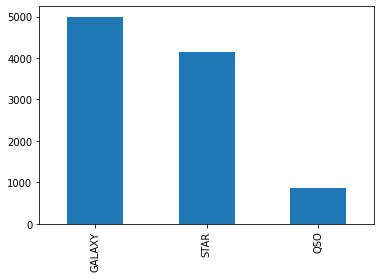

In [40]:
df['class'].value_counts().plot(kind='bar')

The data is clearly imbalanced towards the GALAXY and STAR classes.

In [41]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

---

# Scikit-learn

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

# Workflow

The next figure shows the basic workflow while approaching a Machine Learning problem. We can distinguish two tasks, separate at first but intertwined in the last stages:

* Optimization of the machine learning model (left) which will make the prediction using the data.
* Construction of the dataset (accomplished during the EDA phase) and partitioning in training and test data (right).

![](data/grid_search_workflow.png)
From: https://scikit-learn.org/stable/modules/cross_validation.html

# Data split

We must first split the data in two sets: `X` and `y`. These names are a common convention. `X` for the variables and `y` for the target (class).

In [42]:
y = df.pop('class')
X = df

The next step is to split the data, one more time, into train and test partitions. Scikit-learn can easily do that for us.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24112020)

We get the train partition (80% of our data) and the test partition (20% of our data) randomly selected from all the data and stratified (both partitions has the same class distribution) for better results.

# Cross Validation

Next, we train and optimize the desired model via the cross validation strategy. The next figure shows a graphical representation of this strategy:

![](data/grid_search_cross_validation.png)
From: https://scikit-learn.org/stable/modules/cross_validation.html

# kNN

![](data/knn_example.png)
From: Cheng, Debo, et al. "kNN algorithm with data-driven k value." International Conference on Advanced Data Mining and Applications. Springer, Cham, 2014.

First, we need to define the parameters which will be tested. In this case, the number of neighbors (`k`) that the algorithm will use.

In [44]:
parameters = {'n_neighbors': [x for x in range (3, 16)]}

Next, we instantiate our classifier.

In [45]:
clf = KNeighborsClassifier()

Now we can search for the best `k`. Sklearn offers the `GridSearchCV` method to accomplish this. This method will test all the combination of parameters via cross validation and will return the best parameters obtained during this training phase.

In [46]:
clf = GridSearchCV(clf, parameters, refit=True, cv=StratifiedKFold(), n_jobs=4)

In [47]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In this example, we get `k=15`.

In [48]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [49]:
clf = clf.best_estimator_

After the training step we need to check how the model performs against data that has not been "seen" by the model (the test data).

In [50]:
y_pred = clf.predict(X_test)

After we get the predictions we compare them to the ground-truth to check the model's performance. Once again, sklearn has a classification report with all the common metrics used in this type of problems. 

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.75      0.96      0.85      1000
         QSO       0.57      0.02      0.05       170
        STAR       0.91      0.78      0.84       830

    accuracy                           0.81      2000
   macro avg       0.74      0.59      0.58      2000
weighted avg       0.80      0.81      0.78      2000



# Decision Tree

But what if we use a more complex (yet simple) model? The next figure shows a simple decision tree.

![](data/dt_example.png)
From: https://towardsai.net/p/programming/decision-trees-explained-with-a-practical-example-fe47872d3b53

In [52]:
parameters = {'criterion':('gini', 'entropy'), 
              'max_depth':[5, 10, 15, None]}

In [53]:
clf = tree.DecisionTreeClassifier(random_state=24112020)

In [54]:
clf = GridSearchCV(clf, parameters, refit=True, cv=StratifiedKFold(), n_jobs=4)

In [55]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=24112020), n_jobs=4,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [5, 10, 15, None]})

In [56]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=24112020)

In [57]:
clf = clf.best_estimator_

In [58]:
y_pred = clf.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99      1000
         QSO       0.94      0.91      0.93       170
        STAR       1.00      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.99      0.99      0.99      2000



One of the perks of this model is the interpretability of it. Thanks to sklearn, we can plot the final decision tree:

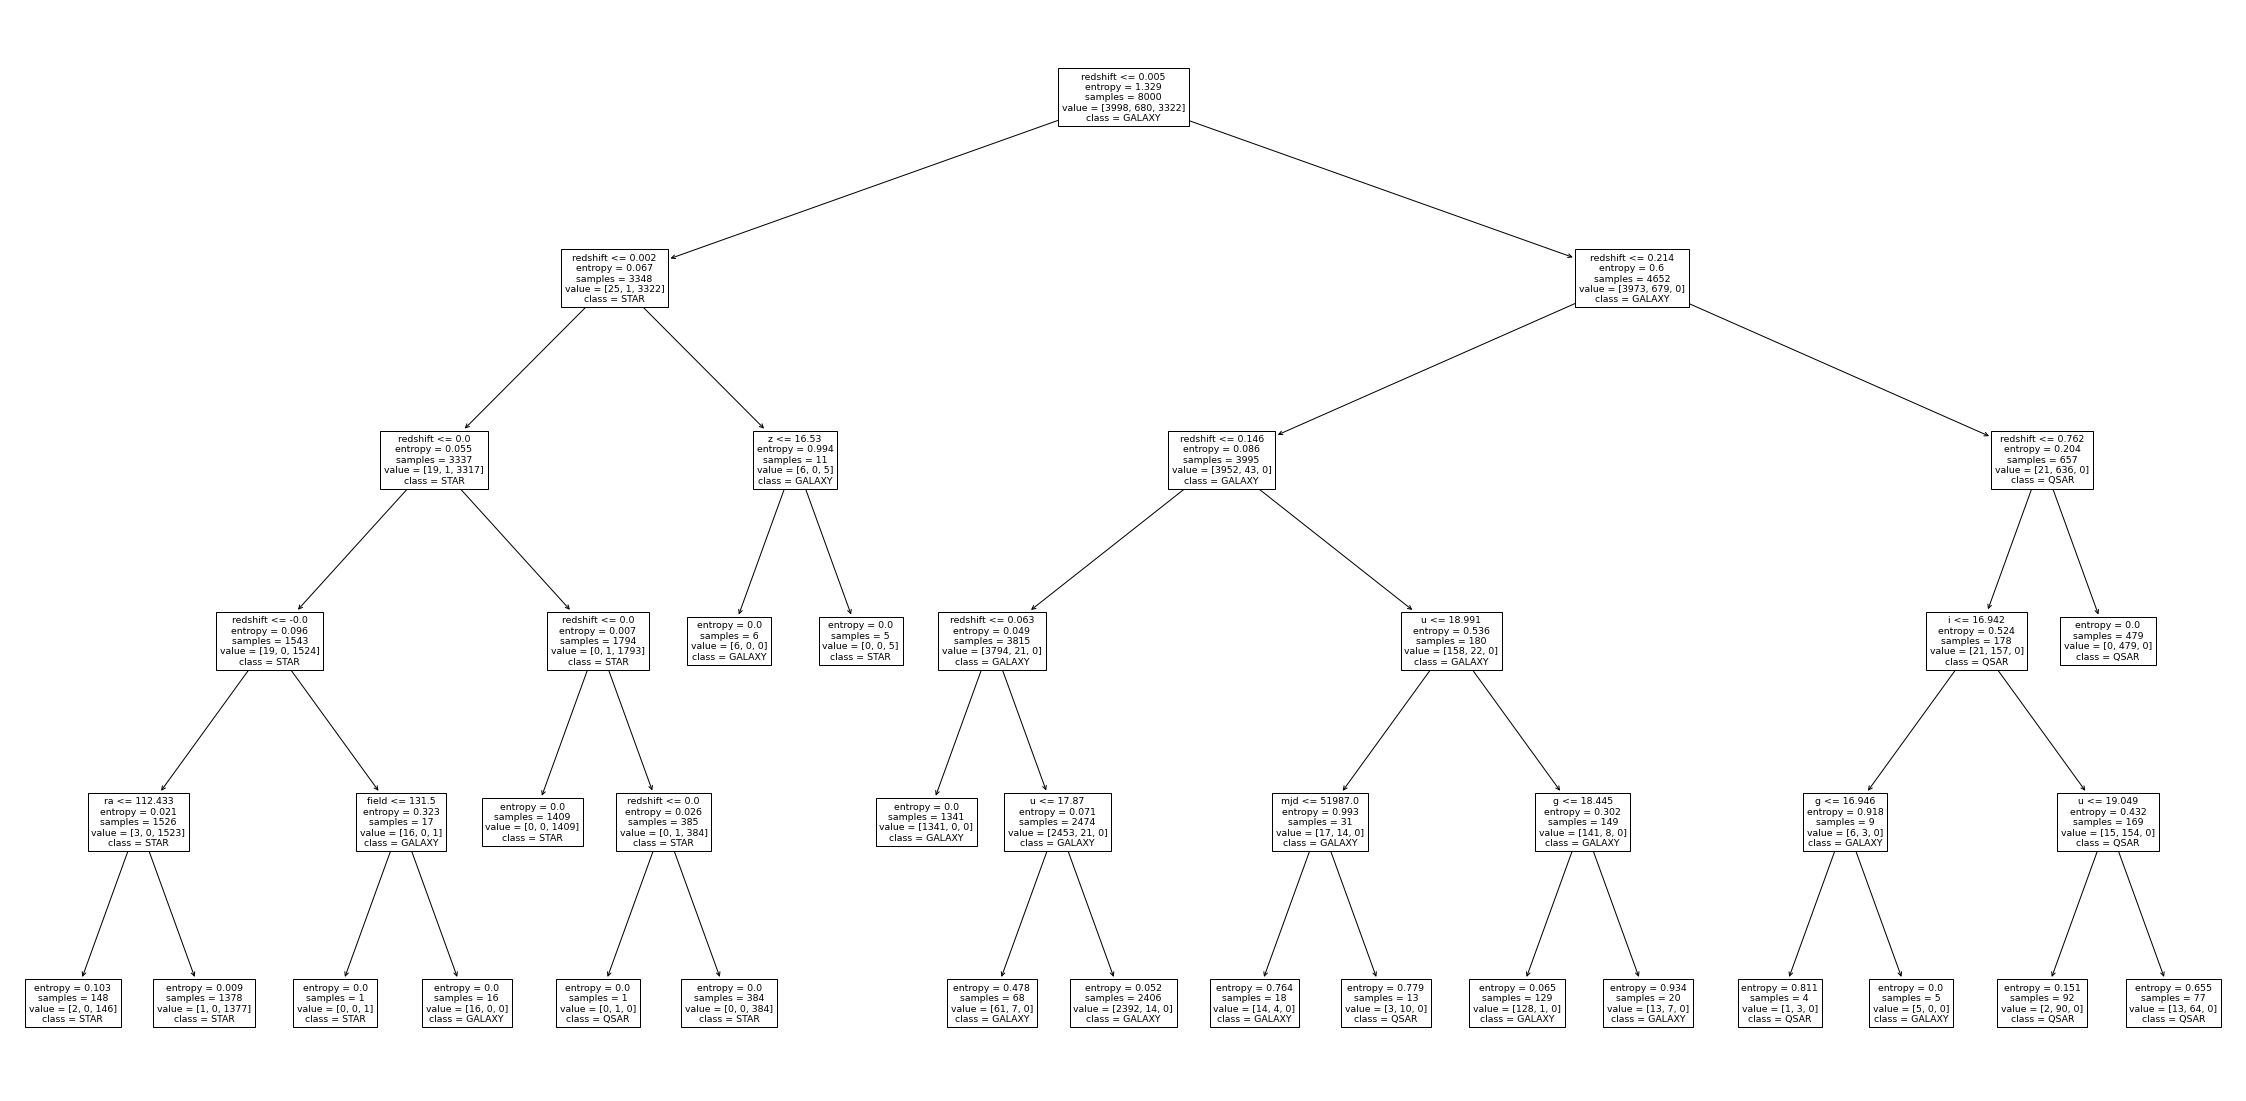

In [60]:
plt.figure(figsize=(40,20))
tree.plot_tree(clf, feature_names=X.columns, class_names=['GALAXY', 'QSAR', 'STAR']);

# Random Forest

Random forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees.

![](data/rf_example.png)
From: https://rpubs.com/Avalos42/randomforest

In [61]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [5, 10, 15, 20],
              'max_depth': [5, 10, 15, None]}

In [62]:
clf = RandomForestClassifier(random_state=24112020)


In [63]:
clf = GridSearchCV(clf, parameters, refit=True, cv=StratifiedKFold(), n_jobs=4)

In [64]:
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=24112020), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'n_estimators': [5, 10, 15, 20]})

In [65]:
clf.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=15, random_state=24112020)

In [66]:
clf = clf.best_estimator_

In [67]:
y_pred = clf.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1000
         QSO       0.96      0.93      0.94       170
        STAR       1.00      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000



This model offers an useful trait: the feature importance. The higher the value the more important is the feature (variable) to the model so we can discard useless variables and improve the performance of the model. This is called "feature selection" and is one of the most powerful preprocessing techniques.

In [69]:
feature_importance = clf.feature_importances_
feature_importance

array([0.00391372, 0.0032789 , 0.02165442, 0.02865361, 0.01082761,
       0.10353049, 0.0497029 , 0.00244479, 0.        , 0.00107068,
       0.00400284, 0.14607243, 0.56476699, 0.03300232, 0.02383341,
       0.0032449 ])

In [70]:
fs_df = pd.DataFrame([X.columns, feature_importance]).T
fs_df.columns = ['Feature', 'Importance']
fs_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
12,redshift,0.564767
11,specobjid,0.146072
5,i,0.10353
6,z,0.0497029
13,plate,0.0330023
3,g,0.0286536
14,mjd,0.0238334
2,u,0.0216544
4,r,0.0108276
10,field,0.00400284


As we can see the `redshift` is the more important feature by a huge margin. Let's see what happens when we train another model with only this feature.

# Support Vector Machine (SVM)

A support-vector machine (SVM) constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.

![](data/svm_example.png)
From: Ulas, Cagdas. (2013). INCORPORATION OF A LANGUAGE MODEL INTO A BRAIN COMPUTER INTERFACE BASED SPELLER. 10.13140/2.1.2017.6326. 

In [71]:
parameters = {'svc__kernel': ['rbf', 'linear', 'poly']}

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name.

In [72]:
clf = make_pipeline(StandardScaler(), SVC(random_state=24112020))

In [73]:
clf = GridSearchCV(clf, parameters, refit=True, cv=StratifiedKFold(), n_jobs=4)

In [74]:
clf.fit(X_train['redshift'].values.reshape(-1, 1), y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=24112020))]),
             n_jobs=4, param_grid={'svc__kernel': ['rbf', 'linear', 'poly']})

In [75]:
clf.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=24112020))])

In [76]:
clf = clf.best_estimator_

In [77]:
y_pred = clf.predict(X_test['redshift'].values.reshape(-1, 1))

As we can see we obtain "nearly perfect" results using only one feature. This is a huge improvement in terms of training speed, prediction speed and model complexity (less complex models are often preferred)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      1000
         QSO       0.96      0.88      0.92       170
        STAR       0.99      1.00      0.99       830

    accuracy                           0.98      2000
   macro avg       0.98      0.95      0.96      2000
weighted avg       0.98      0.98      0.98      2000



# Clustering (K-Means)

Lastly, lets try an unsupervised learning (a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision) model for clustering: K-Means

## Choosing the best number of cluster: the elbow method

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

Text(0.5, 1.0, 'Elbow curve')

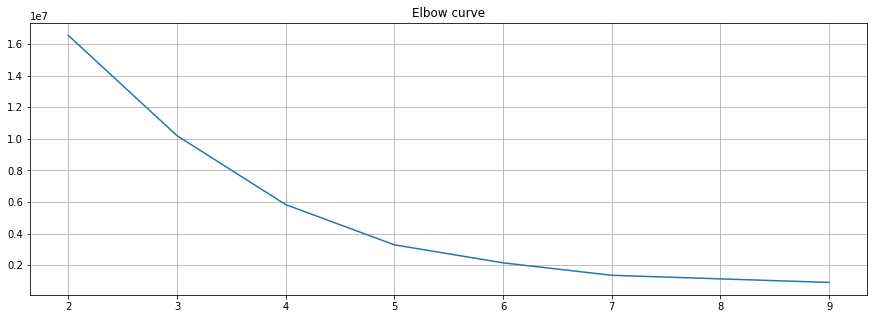

In [79]:
distorsions = []
labels = []
centroids = []
X = X[['ra', 'dec', 'redshift']]
X_test = X_test[['ra', 'dec', 'redshift']]
for k in range(2, 10):
    clf = KMeans(n_clusters=k, random_state=24112020)
    clf.fit(X)
    labels.append(clf.predict(X_test))
    distorsions.append(clf.inertia_)
    centroids.append(clf.cluster_centers_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [80]:
%matplotlib notebook

<IPython.core.display.Javascript object>


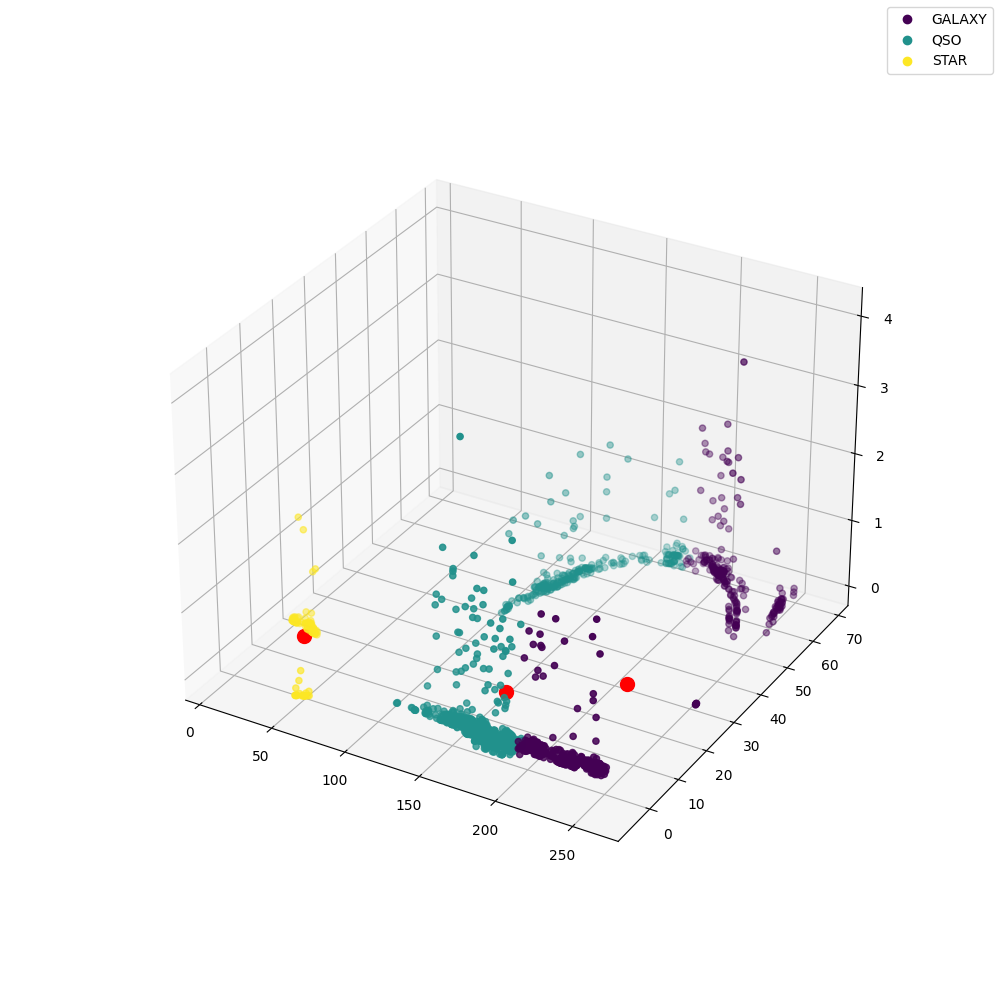

In [81]:
fig = plt.figure('K-Means on SDSS Dataset', figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(centroids[1][0][0], centroids[1][0][1], centroids[1][0][2], c='r', s=100)
ax.scatter(centroids[1][1][0], centroids[1][1][1], centroids[1][1][2], c='r', s=100)
ax.scatter(centroids[1][2][0], centroids[1][2][1], centroids[1][2][2], c='r', s=100)
scatter = ax.scatter(X_test['ra'], X_test['dec'], X_test['redshift'], c=labels[1])
fig.legend(handles=scatter.legend_elements()[0], labels=['GALAXY', 'QSO', 'STAR'])

<IPython.core.display.Javascript object>


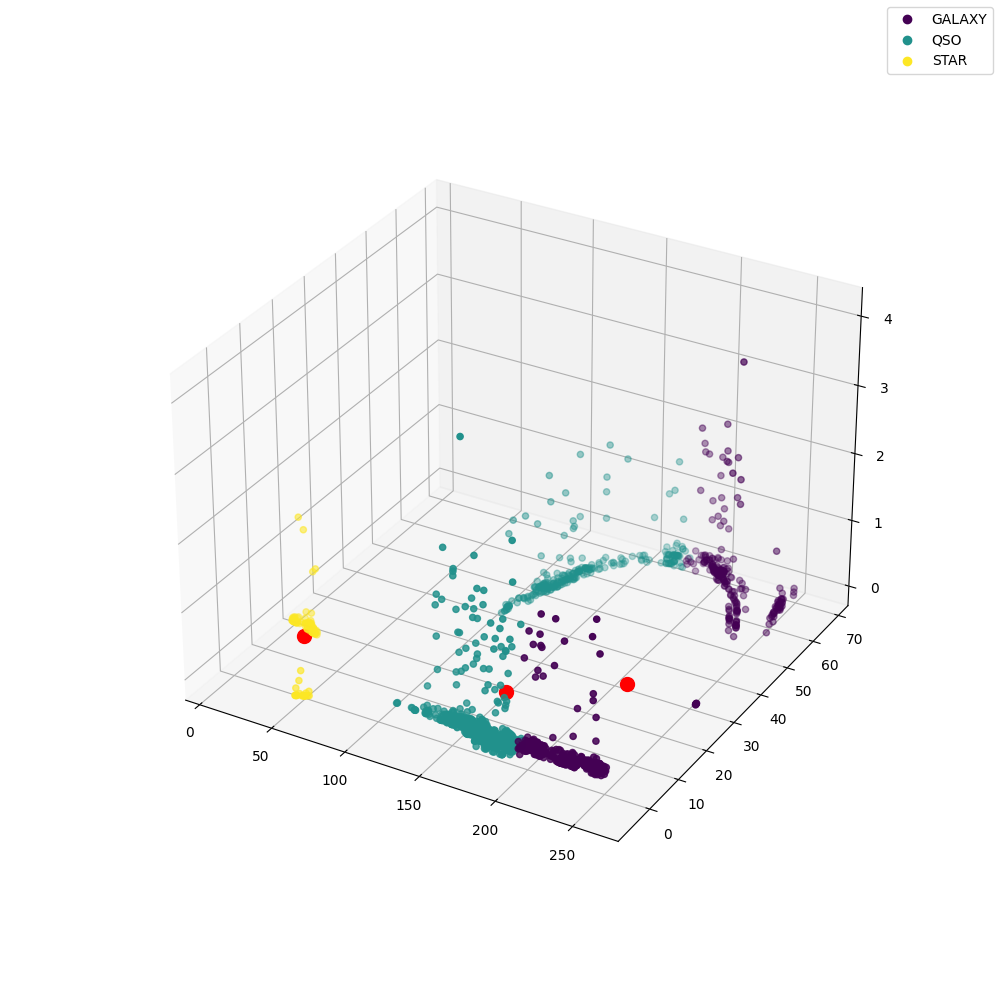

In [82]:
fig